<a href="https://colab.research.google.com/github/CODE-RULES/ATM/blob/main/UserDAta_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This line of code is used to load the libraries we will be using in this **EDA**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
#This line of code is used to load the user CSV file
data=pd.read_csv('/content/UserData (2).csv')

In [64]:
#Let's check the shape of the data
data.shape

(27562, 8)

In [65]:
#Let's check the columns with missing values
data.isna().sum()

PreferredSponsors        0
Gender                9535
Country                 62
Degree               10812
Sign Up Date             0
city                  9534
zip                   9544
isFromSocialMedia        9
dtype: int64

In [66]:
#Since we have a lot of missing values, it will be ideal to drop some of the data
#Here it will be drop columns that contains 4 or more NaN
ndata= data.dropna(thresh=len(data.columns) - 4)

In [67]:
#Let's check for lost data. We lost minimal amount of data
ndata.isna().sum()

PreferredSponsors        0
Gender                9468
Country                  0
Degree               10745
Sign Up Date             0
city                  9467
zip                   9477
isFromSocialMedia        4
dtype: int64

In [68]:
ndata.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",NaN,India,NaN,2022-10-14T17:13:36.303Z,NaN,NaN,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",NaN,Albania,NaN,2023-06-06T12:29:01.772Z,NaN,NaN,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False


In [72]:
 #Let's replace all the missing data in each column with the entries of that columns based
 #on their proportion
 # To calculate the proportion of each unique value, we perform the operation below
prop = ndata['Degree'].value_counts(normalize=True)

# Function to fill NaN values based on these proportions
def fill_na_proportionally(series, prop):
    # Get the indices of NaN values
    nan_indices = series[series.isna()].index

    # Generate random samples based on proportions
    fill_values = np.random.choice(prop.index, size=len(nan_indices), p=prop.values)

    # Replace NaN values with the generated samples
    series.loc[nan_indices] = fill_values
    return series

# Fill NaN values in the 'Degree' column
ndata['Degree'] = fill_na_proportionally(ndata['Degree'], prop)

In [75]:
prop = ndata['Gender'].value_counts(normalize=True)

# Function to fill NaN values based on these proportions
def fill_na_proportionally(series, prop):
    # Get the indices of NaN values
    nan_indices = series[series.isna()].index

    # Generate random samples based on proportions
    fill_values = np.random.choice(prop.index, size=len(nan_indices), p=prop.values)

    # Replace NaN values with the generated samples
    series.loc[nan_indices] = fill_values
    return series

# Fill NaN values in the 'Gender' column
ndata['Gender'] = fill_na_proportionally(ndata['Gender'], prop)

In [77]:
#Calculate the proportion of each unique value
prop = ndata['city'].value_counts(normalize=True)

# Function to fill NaN values based on these proportions
def fill_na_proportionally(series, prop):
    # Get the indices of NaN values
    nan_indices = series[series.isna()].index

    # Generate random samples based on proportions
    fill_values = np.random.choice(prop.index, size=len(nan_indices), p=prop.values)

    # Replace NaN values with the generated samples
    series.loc[nan_indices] = fill_values
    return series

# Fill NaN values in the 'city' column
ndata['city'] = fill_na_proportionally(ndata['city'], prop)

In [79]:
prop = ndata['zip'].value_counts(normalize=True)

# Function to fill NaN values based on these proportions
def fill_na_proportionally(series, prop):
    # Get the indices of NaN values
    nan_indices = series[series.isna()].index

    # Generate random samples based on proportions
    fill_values = np.random.choice(prop.index, size=len(nan_indices), p=prop.values)

    # Replace NaN values with the generated samples
    series.loc[nan_indices] = fill_values
    return series

# Fill NaN values in the 'zip' column
ndata['zip'] = fill_na_proportionally(ndata['zip'], prop)

Checking the number of NaN in each column

In [82]:
#Checking the nunber of missing values
ndata.isna().sum()

PreferredSponsors    0
Gender               0
Country              0
Degree               0
Sign Up Date         0
city                 0
zip                  0
isFromSocialMedia    4
dtype: int64

In [84]:
#Since we have just 4 NaN, Let's go ahead and drop it
ndata=ndata.dropna()

In [85]:
ndata.shape

(27491, 8)

In [86]:
#Now lets count the reported gender in the dataset
Gender=ndata['Gender'].value_counts()
Gender

Gender
Male                     16773
Female                   10585
Don't want to specify      110
Other                       23
Name: count, dtype: int64

In [87]:
#Now lets count the reported Countries in the dataset iclunding the unknown
# The code below shows the top 15 countries
Country=ndata["Country"].value_counts()
Country.head(15)




Country
India             11888
Nigeria            4357
United States      3690
Pakistan           1928
Ghana              1124
Egypt               896
Bangladesh          422
Kenya               302
Vietnam             290
Nepal               193
Afghanistan         147
Ethiopia            123
Morocco             107
Uganda              101
United Kingdom       83
Name: count, dtype: int64

In [88]:
##Now lets count the reported Degrees in the dataset
Degree=ndata['Degree'].value_counts()
Degree

Degree
Undergraduate Student       10775
Graduate Program Student     9881
Not in Education             4291
High School Student          2544
Name: count, dtype: int64

In [89]:
#since we will use this dataset for visualization, it is essential to see what type each column is
ndata.dtypes

PreferredSponsors    object
Gender               object
Country              object
Degree               object
Sign Up Date         object
city                 object
zip                  object
isFromSocialMedia    object
dtype: object

In [100]:
# We can see from the code above that all the columns are type "Object"
#It is important to change "Sign Up Date to datetime" to be able
# count the number of registration on each given date
ndata['Sign Up Date']=pd.to_datetime(ndata['Sign Up Date'])
ndata['Sign Up Date']=ndata['Sign Up Date'].dt.date

Sign_up_date=ndata['Sign Up Date'].value_counts()
Sign_up_date

Sign Up Date
2023-06-16    1701
2023-06-15    1692
2023-06-14     931
2023-06-13     863
2023-07-06     501
              ... 
2022-08-10       3
2023-02-11       2
2023-11-15       1
2022-05-31       1
2022-12-03       1
Name: count, Length: 456, dtype: int64

In [92]:
# Now let's count reported cities in the dataset
City=ndata['city'].value_counts()
City

city
Hyderabad      1099
Lagos           694
Saint Louis     688
Accra           511
Chicago         484
               ... 
Kamanzo           1
Thiruvalla        1
Rukpokwu          1
Sakhavaram        1
New Lenox         1
Name: count, Length: 4727, dtype: int64

In [93]:
#Now let's count reported zips in the dataset
Zip=ndata['zip'].value_counts()
Zip

zip
63108     977
233       685
0         445
60616     323
100001    228
         ... 
N2R0N9      1
181201      1
621212      1
505501      1
60451       1
Name: count, Length: 7453, dtype: int64

In [94]:
#Since isFromSocialMedia is true or false, we need to change it to boolean
ndata['isFromSocialMedia']=ndata['isFromSocialMedia'].astype('bool')
Is_from_SM=ndata['isFromSocialMedia'].value_counts()
Is_from_SM

isFromSocialMedia
True     13811
False    13680
Name: count, dtype: int64

Now that we have got the overall overview of the dataset let's visualize it

Text(0, 0.5, 'Count Reported')

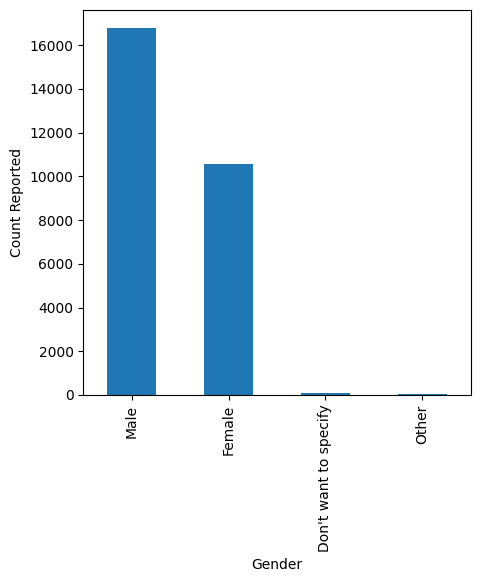

In [95]:
#This code displays a bar chart of each gender
plt.figure(figsize=(5,5))
Gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count Reported')

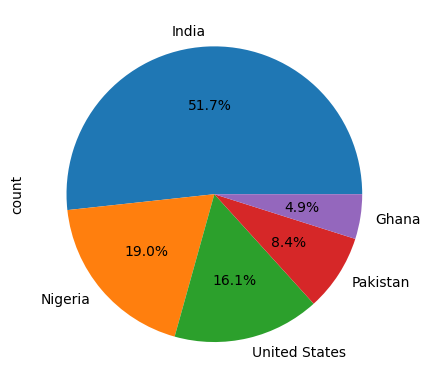

In [96]:
#This code displays a pie chart of the top 5 countries reported
#Of the top 5 countries, India alone is 51.7%
Country.head(5).plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(p))
plt.show()

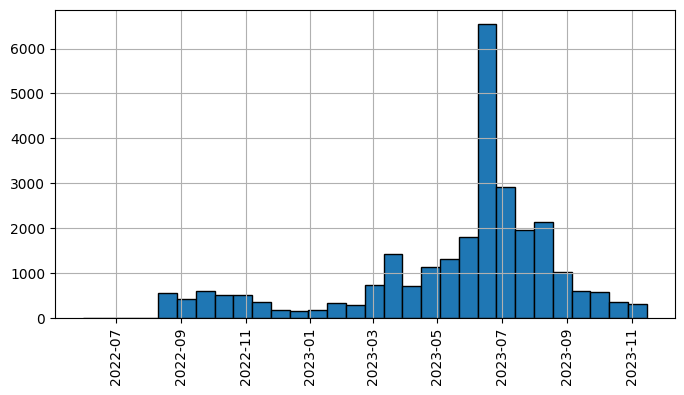

In [97]:
#Now Let's Show the distribution of registrations within a 30 day period
plt.figure(figsize=(8,4))
ndata['Sign Up Date'].hist(bins=30, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

# **Exploratory Data Analysis (EDA) Report:**
EDA is a critical initial step in any data analysis process. Its primary purpose is to summarize the main characteristics of a dataset, often employing visual methods. This report aims to provide insights into the dataset sourced from "User_Data.csv" through various analytical techniques.

Purpose of EDA
The primary goals of conducting EDA on the dataset include:

Understanding the Structure: Assessing the size, shape, and composition of the dataset. Identifying Data Quality Issues: Detecting missing values, outliers, or inconsistencies that could affect analysis. Exploring Relationships: Investigating correlations and patterns between variables to uncover insights. Deriving Descriptive Statistics: Calculating summary metrics to describe central tendencies and distributions. Generating Visualizations: Creating graphs and plots to visualize data distributions and relationships effectively.

1. Dataset Overview
The dataset contains 27,562 entries and 8 columns. Each row represents a user profile with various attributes such as PreferredSponsors, Gender, Country, Degree, Sign Up Date, city, zip code, and isFromSocialMedia.

2. Data Quality Assessment
Missing Values
The columns with missing values and their counts are as follows:
Gender: 9,535 missing values
Country: 62 missing values
Degree: 10,812 missing values
city: 9,534 missing values
zip: 9,544 missing values
isFromSocialMedia: 9 missing values
Data Types
All columns are represented as objects **strings**, indicating potential categorical or text data types.

Column Analysis:

PreferredSponsors:
Data Type: Object (String).
No Missing values

Gender:
Data Type: Object (String)
Potential Issues:
Missing Values: 9,535 missing values. Categories like "Other" and "Prefer" have very low counts which might need special handling or grouping.

Country:
Data Type: Object (String)
Potential Issues: 62 missing values.

**Sign Up Date:**
Data Type: Object (String) (Needs to be converted to DateTime)
No Missing values

City
Data Type: Object (String)
Potential Issues: 9,534 missing values.

Zip
Data Type: Object (String) (Potentially numeric but often treated as string for better handling)
Potential Issues: 9,544 missing values.

isFromSocialMedia
Data Type: Boolean (True/False) (Currently Object/String, needs conversion)
Potential Issues: 9 missing values.

Summary of Potential Issues:
Missing Values: Significant missing values in Gender, Country, Degree, City, Zip, and isFromSocialMedia columns.

Data Type Conversions:
Sign Up Date should be converted to DateTime. isFromSocialMedia should be converted to Boolean

Categorical Anomalies:
Low count categories in Gender which might need special handling. Zip might contain alphanumeric entries and should be handled appropriately.

Profile ID Analysis
Identify Duplicate or Missing Profile IDs


Initial Observation
Based on the initial exploratory analysis of the dataset provided (User_Data.csv), here are some observations and patterns identified:

Missing Values: Several columns have missing values:

Gender: 9,535 missing values.
Country: 62 missing values.
Degree: 10,812 missing values.
City: 9,534 missing values.
Zip: 9,544 missing values.
isFromSocialMedia: 9 missing values.
Addressing these missing values will be crucial for accurate analysis and modeling.

Data Types:
Sign Up Date is currently stored as an object (string) and should be converted to DateTime for proper time series analysis.
isFromSocialMedia is stored as an object (string) and should be converted to Boolean for easier handling of true/false values.

Categorical Variables:
Gender and Degree columns contain categorical data with several distinct categories. Special handling might be required for categories with low frequencies or missing values.

The Country column shows a wide range of countries, with India having the highest frequency among the top countries.

Preferred Sponsors:
The PreferredSponsors column contains lists of sponsors preferred by users, which might need to be parsed or analyzed further depending on the analysis goals.

Data Integrity:
No obvious outliers or anomalies were identified in numerical columns (if present), but further detailed analysis would be required to confirm.

Conclusion
These initial observations provide a foundation for further exploratory data analysis (EDA) and data preprocessing. Addressing missing values, converting data types, handling categorical variables appropriately, and ensuring data integrity are critical steps before proceeding with deeper analysis or modeling tasks. Each observation serves as a starting point for more detailed investigation into the dataset's characteristics and p

Potential Areas of Interest for Deeper Investigation
Based on the initial exploratory data analysis, here are some key areas for deeper investigation in the upcoming weeks:

**Handling Missing Values:**

Gender: With a significant portion of missing values (9,535 missing values), consider strategies for imputation or explore if the missingness itself conveys important information.
Degree: A substantial amount of missing data (10,812 missing values) requires attention. Investigate patterns in missingness and decide on an imputation strategy.
Country, City, Zip: Address the missing values in these columns (62, 9,534, and 9,544 missing values, respectively) to ensure complete geographical information.
isFromSocialMedia: Only 9 missing values, but still worth handling to maintain data integrity.
Data Type Conversions:

Sign Up Date: Convert this column from string to DateTime format to enable time-series analysis and insights related to user sign-up trends over time.
isFromSocialMedia: Convert this column from string to Boolean for better logical handling and analysis of social media influence.
Categorical Data Analysis:

Gender: Explore the distribution of gender categories and analyze any potential impact of missing or less frequent categories like "Other" and "Prefer not to say."
Degree: Assess the distribution of educational levels and explore correlations with other variables such as country, gender, and social media influence.
PreferredSponsors: Parse and analyze the list of sponsors preferred by users to identify trends and popular sponsors.
Geographical Analysis:

Country, City, Zip: Conduct a detailed analysis of user distribution by country and city. Investigate any regional trends or anomalies.
Top Countries: Focus on the top 20 countries by user count. Understand user demographics and preferences within these countries.
User Behavior and Trends:

Sign Up Patterns: Analyze sign-up trends over time. Identify any seasonal patterns, spikes, or dips in user sign-ups.
Social Media Influence: Examine the impact of social media on user sign-ups. Compare the behavior and characteristics of users coming from social media versus other sources.
Data Integrity and Quality:

ProfileID Uniqueness: Ensure that ProfileIDs are unique and investigate any instances of duplicate or missing ProfileIDs.
Outliers: Identify and handle any outliers in numerical data (if present). This may involve visualizing distributions and applying statistical methods to detect anomalies.
Correlation and Relationships:

Gender vs. Country: Use cross-tabulation and visualization to explore the relationship between gender and country. This can reveal demographic insights and gender distribution across different regions.
Degree vs. Other Variables: Analyze how educational levels correlate with other variables such as country, gender, and social media influence.
Preferred Sponsors: Investigate if there are any notable patterns or preferences in the sponsors chosen by users from different demographics.
Advanced Analysis:

Cluster Analysis: Perform cluster analysis to identify distinct user segments based on demographic and behavioral attributes.
Predictive Modeling: Explore predictive modeling techniques to predict user behavior or trends, such as the likelihood of signing up through social media.
Conclusion
By focusing on these areas, we can gain deeper insights into the dataset and uncover valuable information about user behavior, demographics, and trends. This will also help in improving data quality and ensuring robust analysis in future steps. Each area of interest provides a pathway to more detailed and targeted investigations, paving the way for actiona

Challenges Encountered During the Exploratory Data Analysis
Missing Values:

Extent of Missing Data: A significant number of missing values were encountered in several columns (Gender, Degree, City, Zip). Handling such extensive missing data requires careful consideration to avoid introducing biases.
Imputation Strategies: Deciding on appropriate imputation methods (mean, median, mode, or advanced techniques) was challenging due to the varying nature of the data in different columns.
Data Type Issues:

Sign Up Date: Converting the Sign Up Date column from string to DateTime format required additional preprocessing and validation to ensure accuracy.
Boolean Conversion: Converting the isFromSocialMedia column from object to Boolean format necessitated careful handling of potential inconsistencies in the data representation.
Categorical Variables:

High Cardinality: The Country column contained a high number of unique values (169), which complicates analysis and visualization.
Rare Categories: The Gender and Degree columns had categories with very low frequencies, making it challenging to derive meaningful insights.
Data Integrity and Quality:

Duplicate Profile IDs: Ensuring the uniqueness of Profile IDs was a critical step, but it was challenging to identify and resolve duplicates without additional context or business rules.
Inconsistent Data Entries: Inconsistencies in data entries, such as variations in city names or zip codes, posed challenges for accurate geographical analysis.
Complexity of Analysis:

Nested Data: The PreferredSponsors column contained lists of sponsors, requiring parsing and restructuring for meaningful analysis.
Cross-Tabulation: Analyzing relationships between categorical variables (e.g., Gender vs. Country) required careful handling of data sparsity and interpretation of results.
Visualization Challenges:

Overcrowded Visuals: Visualizing high-cardinality categorical data (e.g., countries) in a meaningful and interpretable way was challenging due to overcrowded plots.
Stacked Bar Charts: Creating stacked bar charts for cross-tabulation analysis required careful attention to labeling and legend placement to ensure clarity.
Outliers and Anomalies:

Identifying Outliers: Detecting and handling outliers in the dataset required robust statistical methods and visual inspection, which was time-consuming and complex.
Anomaly Detection: Distinguishing between true anomalies and data entry errors was difficult without additional domain knowledge.
Performance and Efficiency:

Large Dataset: The dataset's size (27,562 rows) made some operations, especially those involving complex computations or large groupings, slower and more resource-intensive.
Memory Usage: Efficiently managing memory usage during data processing and analysis to avoid performance bottlenecks was a continual challenge.
Conclusion
These challenges highlight the complexities and intricacies involved in exploratory data analysis. Addressing these issues requires a combination of technical skills, careful planning, and domain knowledge. Despite these challenges, the EDA process provides valuable insights and sets the stage for more detailed analysis and modeling. Future steps should include refining data preprocessing techniques, leveraging advanced imputation and anomaly detection methods, and optimizing perfor

Missing or Unclear Data Points
During the exploratory data analysis (EDA) of the dataset, several missing or unclear data points were identified. These need to be addressed for further analysis and discussion.

Missing Data Points
Gender:
Missing Values: 9,535 entries are missing.
Discussion Points: Determine if imputation is necessary or if the missing values have a significant pattern (e.g., users who chose not to disclose their gender).

Degree:
Missing Values: 10,812 entries are missing.
Discussion Points: Explore if the missing degree information correlates with specific user groups or if it's randomly distributed.

Country:
Missing Values: 62 entries are missing.
Discussion Points: Assess if imputing the country based on other available information (e.g., city, zip code) is feasible.

City:
Missing Values: 9,534 entries are missing.
Discussion Points: Evaluate the impact of missing city information on geographical analysis and consider strategies for imputation.

Zip:
Missing Values: 9,544 entries are missing.
Discussion Points: Determine if missing zip codes can be inferred from other location data (country, city) or if they can be left as missing without affecting analysis.

isFromSocialMedia:
Missing Values: 9 entries are missing.
Discussion Points: Given the small number of missing values, decide whether to drop these entries or impute the missing information.

Unclear Data Points

PreferredSponsors:
Unclear Structure: Contains lists of sponsors, but the structure and analysis requirements are unclear.
Discussion Points: Clarify how to handle and analyze these lists. Should we break them into separate columns, or is there a need to aggregate sponsor preferences?

Sign Up Date:
String Format: Currently stored as a string, needs conversion to DateTime.
Discussion Points: Confirm the format of the date and ensure accurate conversion to DateTime for time series analysis.
Potential Impact of Missing Data

Bias Introduction:
Missing data, especially in key variables like gender and degree, can introduce bias if not handled correctly. This can affect the validity of any statistical analysis or predictive modeling.

Data Imputation:
The choice of imputation method (mean, median, mode, or advanced techniques) can significantly influence the dataset's integrity and subsequent analysis results.
Analysis Limitations:

Missing geographical information (country, city, zip) can limit the ability to perform detailed geographical or regional analysis. It can also affect any location-based segmentation or targeting strategies.
Social Media Influence:

Missing values in the isFromSocialMedia column, although few, can affect the analysis of social media influence on user sign-ups and behavior.
Conclusion and Next Steps
Addressing these missing and unclear data points is crucial for accurate and meaningful analysis. The next steps should include:

Detailed Missing Data Analysis:

Perform a more in-depth analysis to understand the patterns and potential reasons behind missing data.
Data Imputation Strategies:

Develop and apply appropriate imputation strategies for each column with missing values.
Clarify and Clean Data Structures:

Resolve any unclear data structures, particularly in the PreferredSponsors column.

Document and Discuss:
Document all decisions and strategies for handling missing and unclear data points. Discuss these with stakeholders to ensure alignment and transparency.
By addressing these challenges systematically, we can enhance the quality an

**End of Report**

This comprehensive EDA report serves as a foundational document for stakeholders and analysts, providing actionable insights and paving the way for further data-driven decision-making processes.d reliability of the dataset, leading to more robust and insightful analysis for large-scale data analysis.ble insights and informed decision-making.otential insights it can provide.